In [20]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [129]:
df = pd.read_csv('/coffee.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [130]:
df.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes: xlabel='Close', ylabel='Close'>,
        <Axes: xlabel='Volume', ylabel='Close'>],
       [<Axes: xlabel='Open', ylabel='Volume'>,
        <Axes: xlabe

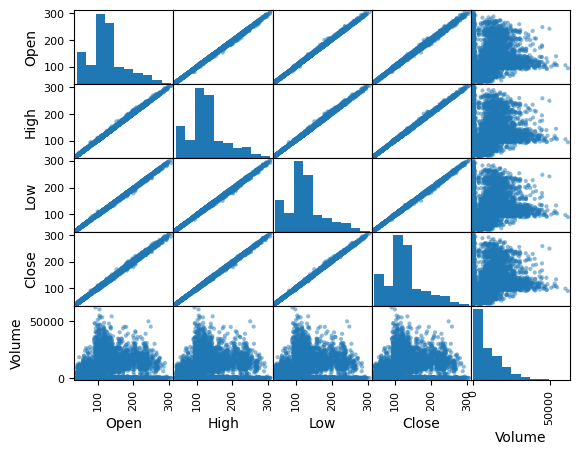

In [131]:
scatter_matrix(df)

In [133]:
df['Close'].mean()

127.21556735120085

In [134]:
num_features = ['Open', 'High', 'Low', 'Volume']
cat_features = ['Currency']

In [135]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [136]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_features),
])

score_transform = StandardScaler()

X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['Close']])

X_test = pipeline.transform(test_df)
Y_test = score_transform.transform(test_df[['Close']])

In [137]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [138]:
Y_hat = model.predict(X_test)


In [139]:
Y_pred = score_transform.inverse_transform(Y_hat)
Y_target = score_transform.inverse_transform(Y_test)

In [140]:
error = mean_squared_error(Y_pred, Y_target)
error

1.352517125402141